# Use NN to classifier two object.

In [1]:


# package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Displat plots inline adn change default figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0,8.0)

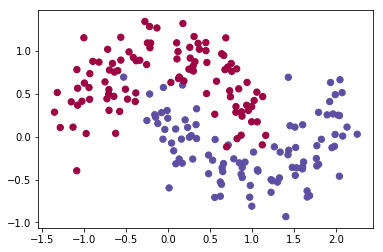

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X,y = sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0],X[:,1], s = 40, c=y, cmap=plt.cm.Spectral)


# Logictic regression

In [3]:
# Train the Logistic regressionn classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [4]:
# Helper function to tplot a decision boundary.
# If you don't understand this function don't worry,it just generated contour plot below
def plot_decision_boundary(pred_func):
    # set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max()+.5
    h= 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

    # predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the contour and training examples
    
    plt.contourf(xx, yy, Z, Cmap = plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Spectral)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'Cmap'
  s)


Text(0.5,1,'Logistic Resgression')

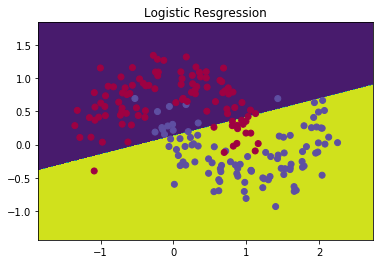

In [5]:
# plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Resgression")

In [6]:
num_examples = len(X) # training set size
nn_input_dim =2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

#Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [7]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [8]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [9]:
# this function learns parameters fo rthe neural network and returns the model
#  nn_hdim: Number of nodes in the hidden layer
# num_passes: Number of passes through the training data for gradient
# print_loss: if True, num_passes = 20000, print_loss=False

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    # Initalize the parameters to random values. We neeed to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim)/np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)/np.sqrt(nn_hdim)
    b2 = np.zeros((1,nn_output_dim))
    
    # THis is what we return at the end
    
    model = {}
    
    # Gradient descent.For each batch...
    
    for i in range(0, num_passes):
        
        # Forward propation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores/ np.sum(exp_scores, axis = 1, keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples),y] -=1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T)*(1 -np.power(a1,2))
        dW1 = np.dot(X.T,delta2)
        db1 = np.sum(delta2,axis=0)
        
        # Add regulariztion terms ( b1 and b2 don't have regularization)

        dW2 += reg_lambda*W2
        dW1 += reg_lambda*W1
        
        # Gradient descent parameter update 
        W1 += -epsilon * dW1
        b1 += -epsilon * db1 
        W2 += -epsilon * dW2
        b1 += -epsilon * db1
        
        # Assign new parameters to the model
        model = {"W1":W1, "b1": b1, "W2":W2, "b2":b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we dont want to do it too open
    
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))

    return model

Loss after iteration 0: 0.432375
Loss after iteration 1000: 0.070757
Loss after iteration 2000: 0.071413
Loss after iteration 3000: 0.070892
Loss after iteration 4000: 0.071530
Loss after iteration 5000: 0.071285
Loss after iteration 6000: 0.071594
Loss after iteration 7000: 0.072296
Loss after iteration 8000: 0.071377
Loss after iteration 9000: 0.071978
Loss after iteration 10000: 0.071191
Loss after iteration 11000: 0.071571
Loss after iteration 12000: 0.071642
Loss after iteration 13000: 0.071387
Loss after iteration 14000: 0.073178
Loss after iteration 15000: 0.071235
Loss after iteration 16000: 0.071623
Loss after iteration 17000: 0.071168
Loss after iteration 18000: 0.071448
Loss after iteration 19000: 0.169328


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'Cmap'
  s)


Text(0.5,1,'Decision Boundary fo hidden layer size 3')

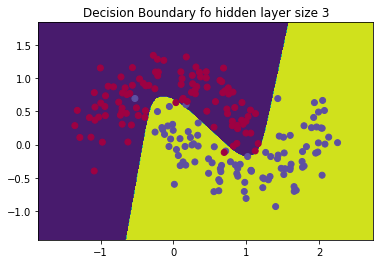

In [10]:
# Build a model with a 3 diemensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary fo hidden layer size 3")

# Varying the hidden layer size


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'Cmap'
  s)


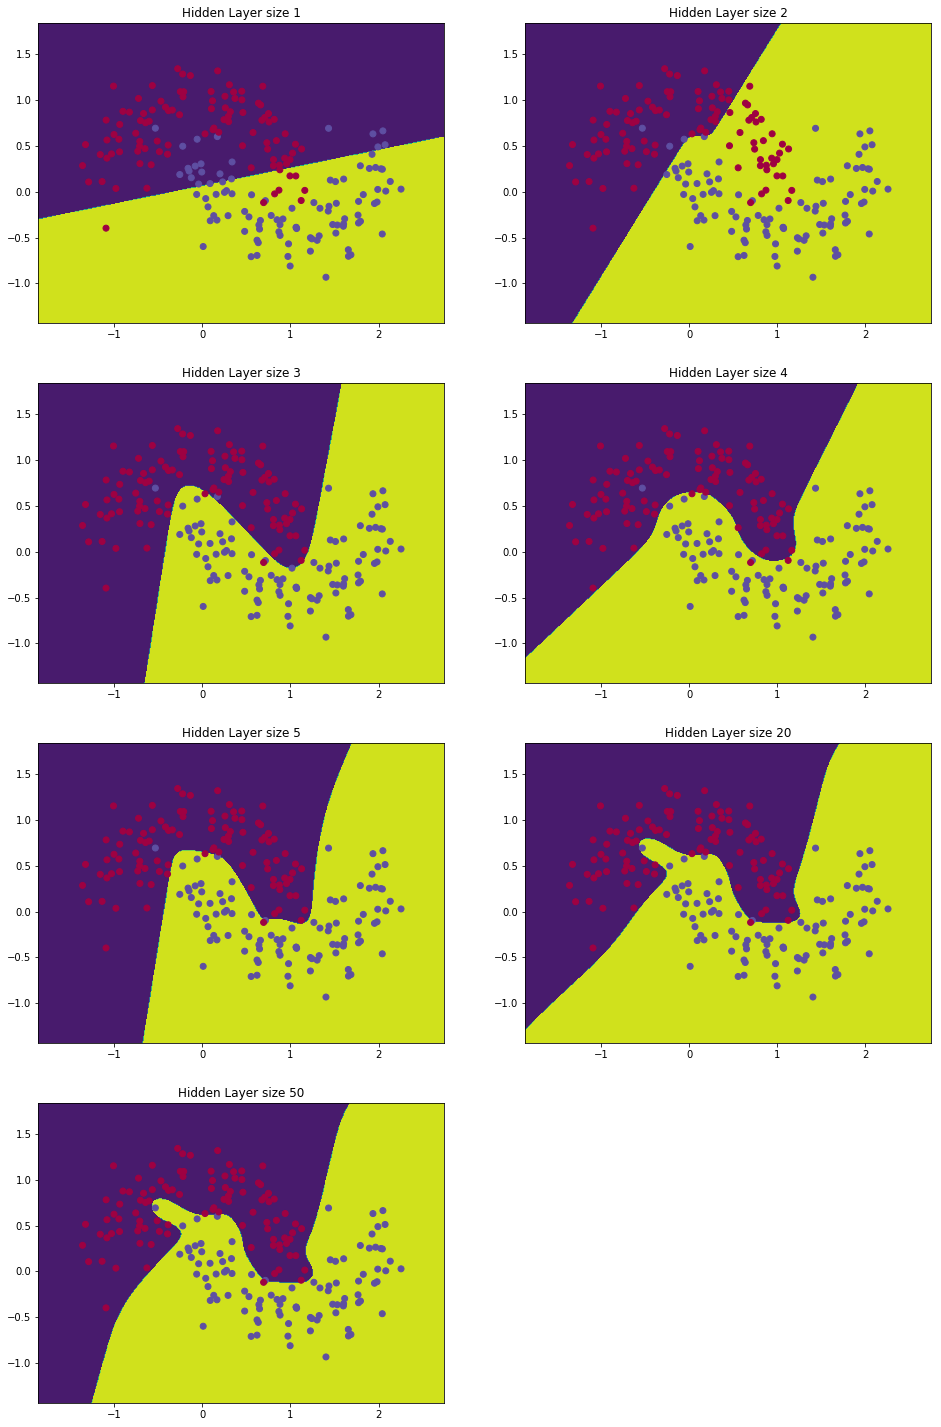

In [11]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()